# CSIT 5800 Introduction to Big Data
## Spring 2020
### Assignment 1 - Data Analysis

### Description
In this assignment, you will have an opportunity to:
<ul>
<li>apply data pre-processing tecniques that you learned in the class to a problem</li>
<li>perform exploratory analysis on the given dataset</li>
<li>apply machine learning techniques that you learned in the class to a problem</li>
</ul>

<br/>
To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.
<br/>

### Intended Learning Outcomes

- Upon completion of this assignment, you should be able to:
<ol>
    <li>Demonstrate your understanding on how to pre-process data using the algorithms / techniques as described in the class.</li>
    <li>Use simple descriptive statistical appraoches to understand your data.</li>
    <li>Construct Python program to analyse the data and draw simple conclusions from it.</li>
    <li>Demonstrate your understanding on how to do prediction using the machine learning algorithms / techniques as described in the class.</li>
    <li>Construct Python program to learn from the training data and do data prediction for the testing set.</li>
</ol>

### Required Libraries
The following libraries are required for this assignment:
<ol>
    <li>Numpy - Numerical python</li>
    <li>Scipy - Scientific python</li>
    <li>Matplotlib - Python 2D plotting library</li>
    <li>Seaborn - Visualization library based on matplotlib</li>
    <li>Pandas - Python data analysis library</li>
    <li>Scikit-learn - Python Machine learning library </li>
    <li>Keras - Deep learning library</li>
</ol>
</ol>

### Dataset
The dataset contains daily weather observations from numerous Australian weather stations.
The problem is to predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow
The target variable RainTomorrow means: Will it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. Read more about it here.

## Step 0: Installation and Importing the libraries

### Step 0.1 
We are going to use Keras package which will be using Tensorflow as backend.
Therefore, you will need to install Tensorflow and Keras first
<br/>
<ol>
   <li>To install Tesnsorflow:
      <ul>
         <li>Start the "Anaconda Prompt" and enter the following command:<br />
         pip install --ignore-installed --upgrade tensorflow 
         </li>         
         <li>For more information on installing Tensorflow: <url>https://www.tensorflow.org/install/</url></li>
      </ul>
   </li>
   <li>To install Keras:
      <ul>
         <li>In the "Anaconda Prompt", enter the following command:<br />
         pip install keras 
         </li>
         <li>For more information on installing Keras: <url>https://keras.io/#installation</url></li>
      </ul>
   </li>
</ol>


## Step 1: Importing data and exploring the features (8 points)

### Step 1.1 
To start working, you will need to import the required libraries, and read the data into a pandas DataFrame.
- Import the following libraries using import statements.
<ul>
    <li>pandas (for data manipulation)</li>
    <li>numpy (for multidimensional array computation)</li>
    <li>seaborn and matplotlib.pyplot (both for data visualization)</li>
</ul>
- Read the csv file 'train.csv' using Pandas' read_csv function
(<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv</a>)

Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.

In [1]:
# import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./weatherAUS.csv')

### Step 1.2
Use head function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html">pandas.DataFrame.head</a>) of pandas library to preview the first 10 data.

In [2]:
# preview the top 10 lines
data.head(n=10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


### Step 1.3
Use tail function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html">pandas.DataFrame.tail</a>) of pandas library to preview the last 10 data.

In [3]:
# preview the last 10 data
data.tail(n=10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142183,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,0.0,No
142184,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0.0,No
142185,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0.0,No
142186,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0.0,No
142187,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,0.0,No
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


### Step 1.4
Display informtion on dataframe using info function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html">pandas.DataFrame.info</a>) of pandas library.

In [4]:
# display informtion on dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

### Step 1.5
Evaluate the distribution of features using describe function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html">pandas.DataFrame.describe</a>) of the pandas library.

In [5]:
# evaluate the distribution of numeric features
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### Step 1.6
Evaluate the distribution of categorical features using describe function.

In [6]:
# evaluate the distribution of string features
data.describe(include=[np.object])


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2017-02-20,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


### Step 1.7
Evaluate the data quality & perform missing values assessment using isnull function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html">pandas.isnull</a>) and sum function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html">pandas.DataFrame.sum</a>) of pandas library.

List the features with missing values.

In [7]:
# the number of missing values in different features
data.isnull().sum()


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

### Step 1.8

Let's explore the <strong>RainTomorrow</strong> feature


#### Step 1.8.1
We can check on the number of unique values by using the nunique function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html">pandas.DataFrame.nunique</a>) of pandas library.

In [8]:
# the number of unique values
data['RainTomorrow'].nunique()


2

#### Step 1.8.2
We can get the list of unique values by using the unique function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unique.html">pandas.DataFrame.unique</a>) of pandas library.

In [9]:
# the list of unique values
data['RainTomorrow'].unique()


array(['No', 'Yes'], dtype=object)

#### Step 1.8.3

To explore the <strong>RainTomorrow</strong> feature, evaluate its distribution using countplot function (<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">seaborn.countplot</a>) of seaborn library.

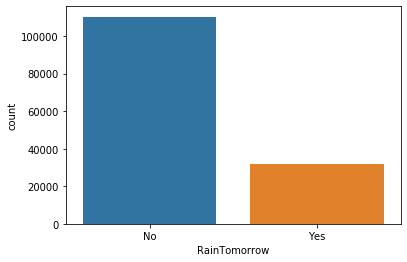

In [10]:
# evaluate its distribution by countplot
sns.countplot(x='RainTomorrow',data=data)


### Step 1.9
Use select_dtypes function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">pandas.DataFrame.select_dtypes</a>) of pandas library to 
get the features that are categorical.

In [11]:
# get the features that are categorical
data.select_dtypes(include='object')


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No
142189,2017-06-21,Uluru,E,SE,ENE,No,No
142190,2017-06-22,Uluru,NNW,SE,N,No,No
142191,2017-06-23,Uluru,N,SE,WNW,No,No


### Step 1.10
Use select_dtypes function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">pandas.DataFrame.select_dtypes</a>) of pandas library to 
get the features that are numerical (i.e. not categorical).

In [12]:
# get the features that are numerical
data.select_dtypes(include='number')


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


## Step 2: Drop the feature, RISK_MM (2 points)

As described in the dataset description, we will need to drop the feature, RISK_MM, using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">pandas.DataFrame.drop</a> of the pandas library.

In [13]:
# drop the feature 'RISK_MM'
data = data.drop(columns=['RISK_MM'])
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Step 3: Transforming data  (5 points)

### Step 3.1 Processing the date feature

#### Step 3.1.1
Use the to_datetime() function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html">pandas.to_datetime()</a>) of the pandas library to convert the <strong>Date</strong> attribute to <a href="https://docs.python.org/3/library/datetime.html#datetime-objects">datetime</a> objects.

In [14]:
# convert the Date attribute to datetime objects
data['Date'] = pd.to_datetime(data['Date'])


#### Step 3.1.2
What is the data type of the converted date?

You can access the property dtypes (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html">pandas.DataFrame.dtypes</a>) of pandas library 

In [15]:
# the data type of the converted date
data.dtypes


Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

#### Step 3.1.3
Extract the <strong>year</strong>, <strong>month</strong>, <strong>day</strong> attributes of the <strong>datetime</strong> objects converted for the <strong>Date</strong> feature and create the corresponding new features <strong>Year</strong>, <strong>Month</strong> and <strong>Day</strong>.

In [16]:
# Extract the year, month, day attributes of the datetime objects
years, months, days = [],[],[]
for i in range(data['Date'].shape[0]):
    years.append(data['Date'][i].year)
    months.append(data['Date'][i].month)
    days.append(data['Date'][i].day)
    
# create the corresponding new features Year, Month and Day
data['Year'] = years
data['Month'] = months
data['Day'] = days


#### Step 3.1.4
Drop the original <strong>Date</strong> feature.

In [17]:
# drop the original Date feature
data = data.drop(columns=['Date'])


Let's check the information of the resulted dataframe <strong>data</strong>.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null obje

## Step 4: Preparing Training and Testing Datasets  (5 points)

### Step 4.1 
Prepare data - feature set and target set
- Build target set Y by extracting 'RainTomorrow' from data
- Build feature set X by excluding/dropping the 'RainTomorrow' from data

In [19]:
# prepare data - feature set and target set
Y = data['RainTomorrow']
X = data.drop(columns=['RainTomorrow'])

### Step 4.2 
Split the data into training and testing datasets

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">sklearn.model_selection.train_test_split()</a> function to split the training data, feature set and target set (i.e. X and Y), into two subsets for training and validation, i.e. X_train, X_valid, Y_train, Y_valid.

<ul>
<li>Set test_size to 0.3. test_size is the proportion of the dataset to include in the test split. <li>Set random_state to 0. This integer value is the seed used by the random number generator.</li>
</ul>

In [20]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


### Step 4.3
Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function to view the dimensionality of the training and testing datasets of features and targets

In [21]:
# view the dimensionality
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(99535, 24)
(99535,)
(42658, 24)
(42658,)


## Step 5: Cleaning data: Handling missing values  (10 points)

### Step 5.1 Categorical features with missing values of the training dataset

#### Step 5.1.1

<span style="color:red">Which categorical features are with missing values?</span>

<span style="color:red"> WindGustDir, WindDir9am, WindDir3pm, RainToday </span>



#### Step 5.1.2
Use the most common value of the feature to impute the missing values. Again, fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of the pandas library can be used.

In [22]:
# impute the missing values by most common value
mcv = X_train.select_dtypes(include='object').mode().iloc[0,:]
X1_train = X_train.select_dtypes(include='object').fillna(mcv)


### Step 5.2 Numerical features with missing values of the training dataset

#### Step 5.2.1
<span style="color:red">Which numerical features are with missing values?</span>

<span style="color:red"> MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm </span>



#### Step 5.2.2
Use mean / median to impute the missing values of the feature with the second least missing values. fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library can be used.

In [23]:
# impute the missing values by median
med = X_train.select_dtypes(include='number').median()
X2_train = X_train.select_dtypes(include='number').fillna(med)

X_train = pd.concat([X1_train,X2_train],axis=1)


### Step 5.3 Handling missing values of the testing dataset

#### Step 5.3.1 Categorical features of the testing dataset
Use the most common value of the feature to impute the missing values. Again, fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of the pandas library can be used.

In [24]:
# impute the missing values by most common value
mcv = X_test.select_dtypes(include='object').mode().iloc[0,:]
X1_test = X_test.select_dtypes(include='object').fillna(mcv)


#### Step 5.3.2 Numerical features of the testing dataset
Use mean / median to impute the missing values of the numerical features. fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library can be used.

In [25]:
# impute the missing values by median
med = X_test.select_dtypes(include='number').median()
X2_test = X_test.select_dtypes(include='number').fillna(med)

X_test = pd.concat([X1_test,X2_test],axis=1)


## Step 6 Normailzation  (10 points)

### Step 6.1 Normalization of the training dataset

#### Step 6.1.1

We can get the skewness and kurtosis using 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html">pandas.DataFrame.skew</a>
and 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html">pandas.DataFrame.kurt</a> functions.
<br />

Find the features which are with skewness values larger than 0.75, and print the features together with their skewness values

In [26]:
# features with skewness values larger than 0.75
X_train.skew()[X_train.skew() > 0.75]


Rainfall         10.032299
Evaporation       4.597133
WindGustSpeed     0.924132
WindSpeed9am      0.783646
dtype: float64

#### Step 6.1.2

Transform the feature Rainfall.

##### Step 6.1.2.1
Explore the distribution of Rainfall using <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html">seaborn.displot</a> function.

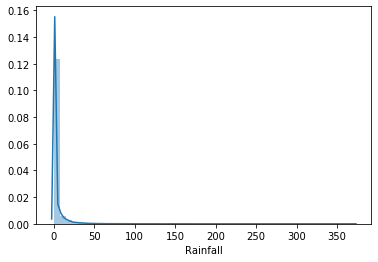

In [27]:
# explore the distribution of Rainfall
sns.distplot(X_train['Rainfall'])


##### Step 6.1.2.2

Apply log transformation to Rainfall using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html">numpy.log1p</a> function.

In [28]:
# apply log transformation to Rainfall
X_train['Rainfall'] = X_train['Rainfall'].apply(np.log1p)


##### Step 6.1.2.3

Plot the distribution of Rainfall using seaborn.distplot function again.

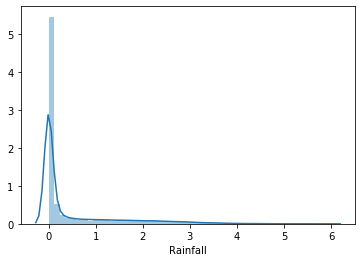

In [29]:
# explore the distribution of Rainfall after log
sns.distplot(X_train['Rainfall'])


#### Step 6.1.3

Transform the feature with the next highest skewness value.

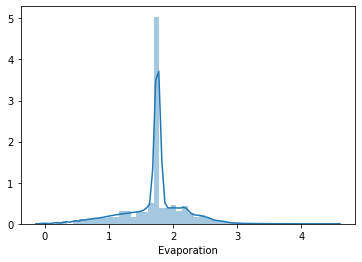

In [30]:
# transform 'Evaporation' feature
X_train['Evaporation'] = X_train['Evaporation'].apply(np.log1p)
sns.distplot(X_train['Evaporation'])

### Step 6.2 Normalization of the testing dataset

Perform similar normalization on the testing dataset

In [31]:
# smooth the skewness
X_test['Rainfall'] = X_test['Rainfall'].apply(np.log1p)
X_test['Evaporation'] = X_test['Evaporation'].apply(np.log1p)


## Step 7 Converting Categorial features  (5 points)

### Step 7.1 convert categorical features into dummy/indicator features of the training dataset

Convert the categorial features using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">get_dummies</a> function of the pandas library.

In [32]:
# one-hot encoding
dum_loc = pd.get_dummies(X_train['Location'],sparse=True,prefix='Loc')
dum_wind = pd.get_dummies(X_train['WindGustDir'],sparse=True,prefix='WGust')
dum_wind9am = pd.get_dummies(X_train['WindDir9am'],sparse=True,prefix='W9am')
dum_wind3pm = pd.get_dummies(X_train['WindDir3pm'],sparse=True,prefix='W3pm')
dum_rtoday = pd.get_dummies(X_train['RainToday'],sparse=True,prefix='Rtoday')
                         
X_train = pd.concat([X_train, dum_loc, dum_wind, dum_wind9am, dum_wind3pm, dum_rtoday],axis=1)
X_train = X_train.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])


Preview the first 10 rows of the training dataset using the head function

In [33]:
X_train.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,W3pm_S,W3pm_SE,W3pm_SSE,W3pm_SSW,W3pm_SW,W3pm_W,W3pm_WNW,W3pm_WSW,Rtoday_No,Rtoday_Yes
95444,13.0,21.0,2.708050,1.757858,6.0,31.0,6.0,17.0,89.0,70.0,...,0,0,0,0,1,0,0,0,0,1
27932,19.5,22.8,3.242592,1.757858,8.4,35.0,13.0,0.0,99.0,83.0,...,0,1,0,0,0,0,0,0,0,1
15097,21.0,33.4,0.000000,1.757858,8.4,39.0,4.0,19.0,26.0,17.0,...,0,0,0,0,0,0,0,0,1,0
94607,10.3,19.8,1.757858,1.335001,5.5,54.0,9.0,20.0,78.0,50.0,...,0,0,0,0,0,0,0,0,0,1
99888,15.5,25.3,0.182322,1.757858,8.4,31.0,4.0,20.0,80.0,77.0,...,0,0,0,0,1,0,0,0,1,0
18813,13.6,22.3,0.470004,1.757858,8.4,67.0,7.0,11.0,51.0,47.0,...,0,0,0,0,0,0,0,0,1,0
61149,9.9,26.6,0.000000,1.568616,12.9,43.0,13.0,20.0,55.0,41.0,...,0,0,0,0,0,0,0,0,1,0
88253,23.0,37.9,0.000000,1.757858,8.4,54.0,24.0,37.0,52.0,70.0,...,0,0,0,0,0,0,0,0,1,0
138427,19.8,31.3,0.000000,2.079442,11.1,46.0,28.0,30.0,64.0,44.0,...,0,0,0,0,0,0,0,0,1,0
33311,17.0,30.2,0.000000,1.435085,10.6,33.0,15.0,22.0,53.0,38.0,...,0,0,0,0,0,0,0,0,1,0


### Step 7.2 convert categorical features into dummy/indicator features of the testing dataset


#### Step 7.2.1
Convert the categorial features using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">get_dummies</a> function of the pandas library.

In [34]:
# one-hot encoding
dum_loc = pd.get_dummies(X_test['Location'],sparse=True,prefix='Loc')
dum_wind = pd.get_dummies(X_test['WindGustDir'],sparse=True,prefix='WGust')
dum_wind9am = pd.get_dummies(X_test['WindDir9am'],sparse=True,prefix='W9am')
dum_wind3pm = pd.get_dummies(X_test['WindDir3pm'],sparse=True,prefix='W3pm')
dum_rtoday = pd.get_dummies(X_test['RainToday'],sparse=True,prefix='Rtoday')
                         
X_test = pd.concat([X_test, dum_loc, dum_wind, dum_wind9am, dum_wind3pm, dum_rtoday],axis=1)
X_test = X_test.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])


#### Step 7.2.2

Align the testing dataset with the training dataset using the 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.align.html">pandas.DataFrame.align</a> function.

You may set the parameter join with the value 'left' and the parameter axis with the value 1.

In [35]:
# align the testing dataset with the training dataset
(X_test, X_train) = X_test.align(X_train, join='left', axis=1)


Preview the first 10 rows of the testing dataset using the head function

In [36]:
X_test.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,W3pm_S,W3pm_SE,W3pm_SSE,W3pm_SSW,W3pm_SW,W3pm_W,W3pm_WNW,W3pm_WSW,Rtoday_No,Rtoday_Yes
86232,17.4,29.0,0.000000,1.526056,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,1,0
57576,6.8,14.4,0.587787,0.587787,8.5,46.0,17.0,22.0,80.0,55.0,...,1,0,0,0,0,0,0,0,1,0
124071,10.1,15.4,2.747271,1.757858,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,1,0,0,0,0,0,0,1
117955,14.4,33.4,0.000000,2.197225,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,1,0,0,0,1,0
133468,6.8,14.3,2.397895,0.182322,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,1
136631,19.3,29.9,0.000000,2.322388,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,1,0
75844,17.9,25.8,0.000000,2.451005,2.1,44.0,17.0,19.0,56.0,99.0,...,0,0,0,1,0,0,0,0,1,0
21853,13.8,20.1,0.000000,1.481605,6.2,65.0,19.0,15.0,62.0,81.0,...,0,0,0,0,0,0,1,0,1,0
19088,20.2,26.7,0.336472,1.757858,8.5,31.0,2.0,11.0,86.0,64.0,...,0,0,0,0,0,0,0,0,1,0
132305,8.5,20.2,0.000000,1.757858,8.5,33.0,6.0,20.0,70.0,47.0,...,0,0,0,0,0,0,0,0,1,0


Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function to view the dimensionality of the training and testing datasets of features and targets

In [37]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(Y_train.shape))
print("y_test : " + str(Y_test.shape))

X_train : (99535, 118)
X_test : (42658, 118)
y_train : (99535,)
y_test : (42658,)


### Step 7.3

<span style="color:red">Any additional preprocessing steps may be needed if we have another testing dataset (which is not splitted from one dataset)?</span>


<span style="color:red"> 
Drop RISK_MM feature;
Convert Date feature into Year, Month, Day features;    
Other preprocessing steps to make the features consist;
</span>



## Step 8: Training the Regression model using Sklearn  (10 points)

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">sklearn.linear_model.LogisticRegression</a> to build a linear gression model.

### Step 8.1 
Import the LinearRegression from sklearn.linear_model.

In [38]:
# import the LinearRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression


### Step 8.2 
Build the logistic regression model by:
<ol>
<li>Initialize a Logistic Regression model by LogisticRegression() function.</li>
<li>Call fit() function to train the logistic regression model using the training feature data (i.e. X_train).</li>
<li>Predict the target values for the testing feature data (i.e. X_test) using the predict() function.
</ol>

In [39]:
# build the logistic regression model
LRM = LogisticRegression(random_state=0,solver='liblinear')
LRM.fit(X_train, Y_train)

# predict the target values 
Y_pred = LRM.predict(X_test)

### Step 8.3
Evaluate the results using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">sklearn.metrics.accuracy_score</a> function of the sklearn library.

In [40]:
# evaluate the results
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


0.846031225092597

<span style="color:red">What is the paramter C? How does it affect the result?</span>

<span style="color:red">
The parameter is the inverse of regularization strength.<br>
In general, smaller values mean stronger regularization effects.
</span>



## Step 9: Training the Neural Network model using Keras (10 points)

### Step 9.1
Import the following libraries using import statements.
<ul>
    <li>keras (for deep learning) (Reference: <url>https://keras.io/</url>)
        <ul>
            <li>Sequential from keras.models</li>
            <li>Dense from keras.layers</li>
            <li>ModelCheckpoint from keras.callbacks</li>
        </ul>
    </li>    
</ul>
<br />
Note: Tensorflow and Keras have to be installed first, see <strong>Step 0.1</strong>

In [41]:
# import libries from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


### Step 9.2
- Build a neural network to learn from the given training set - trainData.
(Reference: <a href="https://faroit.github.io/keras-docs/1.0.1/getting-started/sequential-model-guide/">Here</a>)
<ol>
  <li>Initalizing a neural network using Sequential() function and name the returned object NN.</li>
  <li>Adding the input layer and the hidden layer using add function of NN and Dense function.</li>
  <li>Adding the output layer using add function of NN and Dense function.</li>
  <li>Prints a summary representation of our model by calling summary function of NN.</li>
</ol>

In [42]:
# initalizing a neural network using Sequential Model
NN = Sequential()

# Adding the input layer and the hidden layer using add function of NN and Dense function
# input layer
NN.add(Dense(200,input_dim=X_train.shape[1],activation='relu',))
NN.add(Dropout(0.5))

# hidden layer
NN.add(Dense(200,activation='relu'))
NN.add(Dropout(0.5))
NN.add(Dense(50,activation='relu'))
NN.add(Dropout(0.5))

# output layer
NN.add(Dense(1))

# print summary
NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               23800     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

### Step 9.3
- Compile the neural network and start training
<ol>
  <li>Call <a href="https://keras.io/models/sequential/#compile">compile()</a> function of NN to compile the neural network
            Parameters of compile function:
      <ul>
          <li>loss to 'binary_crossentropy': loss is a stochastic gradient decent depends on loss.</li>
          <li>optimizer to 'Adam': optimizer is the algorithm that we want to use to find optimal set of weights. For details about 'Adam', please visit <a href="https://arxiv.org/abs/1412.6980v8">here</a>.              
          </li>
          <li>metrics to ['accuracy']: metrics is the metric(s) that we want to use to improve the performance of our neural network. In our case, accuracy is the metrics.</li>
      </ul>

  </li>
  <li>Call <a href="https://keras.io/models/sequential/#fit">fit()</a> function of NN to train the model on training data</li>
</ol>

Note: You may need to convert the training target dataset Y_train from 'Yes'/'No' to 1/0 first. E.g.
<pre> Y_train_new = (Y_train == 'Yes')</pre>

In [43]:
# compile the neural network
NN.compile(loss = 'binary_crossentropy',
          optimizer = 'Adam',
          metrics = ['accuracy'])

# train the neural network
Y_train_new = (Y_train=='Yes')
NN.fit(X_train, Y_train_new, epochs=10)


Train on 99535 samples
Epoch 1/10
99535/99535 [==============================] - 7s 69us/sample - loss: 4.6992 - accuracy: 0.6946
Epoch 2/10
99535/99535 [==============================] - 7s 69us/sample - loss: 3.6005 - accuracy: 0.7665
Epoch 3/10
99535/99535 [==============================] - 6s 62us/sample - loss: 3.8541 - accuracy: 0.7499
Epoch 4/10
99535/99535 [==============================] - 6s 64us/sample - loss: 3.5248 - accuracy: 0.7714
Epoch 5/10
99535/99535 [==============================] - 6s 65us/sample - loss: 3.4854 - accuracy: 0.7740
Epoch 6/10
99535/99535 [==============================] - 6s 64us/sample - loss: 3.4714 - accuracy: 0.7749
Epoch 7/10
99535/99535 [==============================] - 6s 62us/sample - loss: 3.4527 - accuracy: 0.7762
Epoch 8/10
99535/99535 [==============================] - 6s 63us/sample - loss: 3.4535 - accuracy: 0.7761
Epoch 9/10
99535/99535 [==============================] - 6s 63us/sample - loss: 3.4535 - accuracy: 0.7761
Epoch 10/10
99

### Step 9.4 
Evaluate the model with Validation dataset

<ol>
<li>Evaluate the model with the validation data using the <a href="https://keras.io/models/sequential/#evaluate">evaluate()</a> function.
The evaluate function returns the loss value and metrics values for the model in test mode.
</ol>

Note: You may also need to convert the testing target dataset Y_test from 'Yes'/'No' to 1/0 first. 

In [44]:
# Evaluate the model with Validation dataset
Y_test_new = (Y_test=='Yes')
[loss, acc] = NN.evaluate(X_test,Y_test_new)
print('loss: '+str(loss))
print('accuracy: '+str(acc))

42658/42658 [==============================] - 1s 22us/sample - loss: 3.4793 - accuracy: 0.7744
loss: 3.4792736184608755
accuracy: 0.77443856


## Step 10 -- Standardization and Rescaling (10 points)

Rescaling and Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

(Reference: <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">here</a>)

Performs the rescaling on both the training and testing datasets:
<ol>
<li>Import the MinMaxScaler from sklearn.preprocessing module</li>
<li>Initializing a MinMaxScaler by using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">sklearn.preprocessing.MinMaxScaler</a> function, which transforms the numerical features by scaling each feature to a given range of [0, 1], i.e. between zero and one.</li>
<li>Compute the minimum and maximum to be used for later scaling by using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit">sklearn.preprocessing.MinMaxScaler.fit()</a> function.</li>
<li>Transform the data using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.transform">sklearn.preprocessing.MinMaxScaler.transform()</a> function.</li>
<li>The tranformed data is an numpy array. Convert it into a pandas.DataFrame using
pandas.DataFrame() function with pandas.DataFrame.columns.</li>
<li>Use the pandas.DataFrame.head() function to preview the data.</li>
</ol>

In [45]:
# perform the rescaling on training dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
numpy_train = scaler.transform(X_train)
X_train = pd.DataFrame(numpy_train,columns=X_train.columns)

# perform the rescaling on testing dataset
scaler = MinMaxScaler()
scaler.fit(X_test)
numpy_valid = scaler.transform(X_test)
X_test = pd.DataFrame(numpy_valid,columns=X_test.columns)

Review the first 10 rows of the training feature set using pandas.DataFrame.head().

In [46]:
X_train.head(n=10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,W3pm_S,W3pm_SE,W3pm_SSE,W3pm_SSW,W3pm_SW,W3pm_W,W3pm_WNW,W3pm_WSW,Rtoday_No,Rtoday_Yes
0,0.503563,0.487713,0.457526,0.393415,0.413793,0.193798,0.046154,0.204819,0.89,0.70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.657957,0.521739,0.547838,0.393415,0.579310,0.224806,0.100000,0.000000,0.99,0.83,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.693587,0.722117,0.000000,0.393415,0.579310,0.255814,0.030769,0.228916,0.26,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.439430,0.465028,0.296991,0.298778,0.379310,0.372093,0.069231,0.240964,0.78,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.562945,0.568998,0.030803,0.393415,0.579310,0.193798,0.030769,0.240964,0.80,0.77,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.517815,0.512287,0.079407,0.393415,0.579310,0.472868,0.053846,0.132530,0.51,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.429929,0.593573,0.000000,0.351062,0.889655,0.286822,0.100000,0.240964,0.55,0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.741093,0.807183,0.000000,0.393415,0.579310,0.372093,0.184615,0.445783,0.52,0.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.665083,0.682420,0.000000,0.465386,0.765517,0.310078,0.215385,0.361446,0.64,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.598575,0.661626,0.000000,0.321177,0.731034,0.209302,0.115385,0.265060,0.53,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
X_test.head(n=10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,W3pm_S,W3pm_SE,W3pm_SSE,W3pm_SSW,W3pm_SW,W3pm_W,W3pm_WNW,W3pm_WSW,Rtoday_No,Rtoday_Yes
0,0.641089,0.650295,0.000000,0.306215,0.776224,0.211382,0.126437,0.218391,0.626263,0.606061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.378713,0.363458,0.099461,0.117944,0.594406,0.317073,0.195402,0.252874,0.797980,0.545455,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.460396,0.383104,0.464874,0.352728,0.594406,0.195122,0.149425,0.103448,0.696970,0.606061,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.566832,0.736739,0.000000,0.440890,0.811189,0.276423,0.103448,0.195402,0.393939,0.222222,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.378713,0.361493,0.405755,0.036584,0.510490,0.170732,0.172414,0.149425,0.919192,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.688119,0.667976,0.000000,0.466005,0.769231,0.292683,0.298851,0.195402,0.434343,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.653465,0.587426,0.000000,0.491814,0.146853,0.300813,0.195402,0.218391,0.555556,0.989899,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.551980,0.475442,0.000000,0.297296,0.433566,0.471545,0.218391,0.172414,0.616162,0.808081,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.710396,0.605108,0.056935,0.352728,0.594406,0.195122,0.022989,0.126437,0.858586,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.420792,0.477407,0.000000,0.352728,0.594406,0.211382,0.068966,0.229885,0.696970,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Step 11 -- Training the Regression model on the rescaled and standardized dataset  (5 points)

Re-train the regression model using the rescaled and standardized datasets from Step 10.

In [48]:
# build the logistic regression model
LRM = LogisticRegression(random_state=0,solver='liblinear')
LRM.fit(X_train, Y_train)

# predict the target values 
Y_pred = LRM.predict(X_test)

# evaluate the results
accuracy_score(Y_test,Y_pred)

0.8485864316189226

<span style="color:red">What is your observation of the resulted accuracy?</span> 

<span style="color:red">
The accuracy improved a bit because of the rescalling.
</span>



## Step 12: Explore K-fold cross validation (10 points)

K-fold cross validation is often used to handle the situation of overfitting, i.e. a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

It is performed by splitting the training dataset into k subsets.
Then, models are trained by taking turns on all subsets except one which is held out, and the model performance is evaluated on the held out validation set.
The process is repeated until all subsets are given an opportunity to be the held out validation set. 
The performance measure is then averaged across the performance on all models.

Note: Cross validation is often not used for evaluating deep learning models because of the computational expense. 

Here is the reference on cross validation provided by scikit-learn:
    <url>https://scikit-learn.org/stable/modules/cross_validation.html</url>

### Step 12.1 
Explore and implement the use of 5-fold cross validation with logistic regression.<br />
Print the average accuracy.

In [49]:
# explore and implement the use of 5-fold cross validation with logistic regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LRM, X_train, Y_train, cv=5)
print('average accuracy: ' + str(np.mean(scores)))

average accuracy: 0.8473099914602903


### Step 12.2
Explore and implement the use of 5-fold cross validation with Neural Network.<br />
Print the average accuracy.

In [50]:
# explore and implement the use of 5-fold cross validation with neural network
from sklearn.model_selection import KFold

acc_list = []
kf = KFold(n_splits=5)
for idx_train, idx_vali in kf.split(X_train):
    # spilt the training and validation dataset
    train_x, train_y = X_train.loc[idx_train,:], Y_train[idx_train]
    vali_x, vali_y = X_train.loc[idx_vali,:], Y_train[idx_vali]
    # train the neural network
    train_y_new = (train_y=='Yes')
    NN.fit(train_x, train_y_new)
    # evalute the neural network
    vali_y_new = (vali_y=='Yes')
    [loss, acc] = NN.evaluate(vali_x,vali_y_new)
    acc_list.append(acc)

print('average accuracy: ' + str(np.mean(acc_list)))

Train on 79628 samples
 3200/79628 [>.............................] - ETA: 3s - loss: 2.5114 - accuracy: 0.8372

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


19907/19907 [==============================] - 0s 18us/sample - loss: 2.2626 - accuracy: 0.8533
Train on 79628 samples
19907/19907 [==============================] - 0s 19us/sample - loss: 2.5586 - accuracy: 0.8341
Train on 79628 samples
19907/19907 [==============================] - 0s 16us/sample - loss: 2.4307 - accuracy: 0.8424
Train on 79628 samples
19907/19907 [==============================] - 0s 16us/sample - loss: 2.5198 - accuracy: 0.8366
Train on 79628 samples
19907/19907 [==============================] - 0s 16us/sample - loss: 2.7058 - accuracy: 0.8246
average accuracy: 0.83821774


## Step 13 Build another model which out performs the above models (10 points)
<ol>Notes:
<li>The model should not be one of the models implemented above.</li>
<li>The points you get in this step depends on your model's performance. It will be calculated by the following formula: <br/>
<ul>
<li>min{ 10, max{ 0, 10 * (Your_accuracy - 0.83) / (0.9 - 0.83) } }</li>
</ul>
</li>
<li>Save the prediction results to a CSV file: predictions.csv. (for example, you may use the pandas.DataFrame.to_csv function)</li>
</ol>

In [51]:
from imblearn.combine import SMOTETomek
X_s, Y_s = SMOTETomek().fit_resample(X_train, Y_train)

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,bootstrap=True,max_depth=8)
clf.fit(X_s, Y_s)
Y_pred = pd.Series(clf.predict(X_test))
print(accuracy_score(Y_test, Y_pred)
Y_pred.to_csv('./predictions.csv',header=False)

0.869895447512776


Some functions help to build a better model.

In [53]:
# search for good parameters
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
def search_param():
    clf = xgb.XGBClassifier(objective='binary:logistic',random_state=0,
                            n_estimators=150,max_depth=8,learning_rate=0.15,gamma=0.3)
    params = {'max_depth': [6,10,15]}
    gsCv = GridSearchCV(clf,param_grid=params,cv=5)
    gsCv.fit(X_train, Y_train)
    print(gsCv.best_score_)
    print(gsCv.best_params_)
    
# in order to find the right number of components
def find_PCA_component():
    mean_x = np.mean(X_train,axis=0)
    scat_m = (X_train - mean_x).T.dot((X_train - mean_x))
    eigvals, eigvecs = np.linalg.eig(scat_m)
    keep_idx = (eigvals>1000)
    print(eigvecs[keep_idx].shape[0])
    
# reduce the dimension
from sklearn.decomposition import PCA
def reduce_dimension():
    pca = PCA(n_components=101)
    X = pca.fit_transform(X_train)
    return X

## Step 14 Submission
Submit your jupyter notebook (.ipynb) and the classification results (predictions.csv) to Canvas